In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd 

In [18]:
# (x_train,y_train ), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()
# offline dataset : 
train_data = pd.read_csv('C:/Users/chris/Downloads/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('C:/Users/chris/Downloads/LP-IV-datasets/LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

In [19]:
X_train = train_data.drop('label', axis = 1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis = 1).values
y_test = test_data['label'].values

#reshape into 28 X 28 for mnist or 32 X 32 for cifar10

X_train = X_train.reshape(-1, 32, 32,3)
X_test = X_test.reshape(-1, 32, 32,3)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

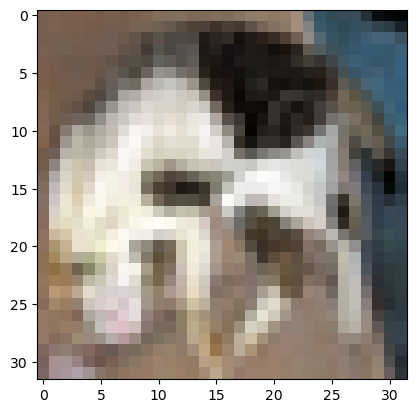

In [21]:
plt.imshow(random.choice(X_train))

In [22]:
print(X_train.shape)
print(y_train.shape)


(50000, 32, 32, 3)
(50000,)


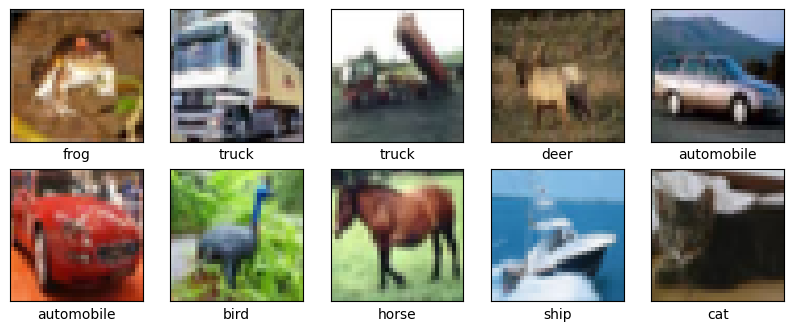

In [23]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [26]:
# Create a list of layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,962 (2.42 MB)

 Trainable params: 633,450 (2.42 MB)

 Non-trainable params: 512 (2.00 KB)

In [34]:
# Compile the model using Adam optimizer
  # Default learning rate for Adam is 0.001
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


# Training the model
history = model.fit(X_train, y_train,
              batch_size=20,
              epochs=3,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 102s 36ms/step - accuracy: 0.8768 - loss: 0.3649 - val_accuracy: 0.7826 - val_loss: 0.7363
Epoch 2/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.8908 - loss: 0.3158 - val_accuracy: 0.7726 - val_loss: 0.8081
Epoch 3/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.8974 - loss: 0.2963 - val_accuracy: 0.7741 - val_loss: 0.7969


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7737 - loss: 0.7866
Loss:  0.7968736290931702
Accuracy:  0.7741000056266785


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


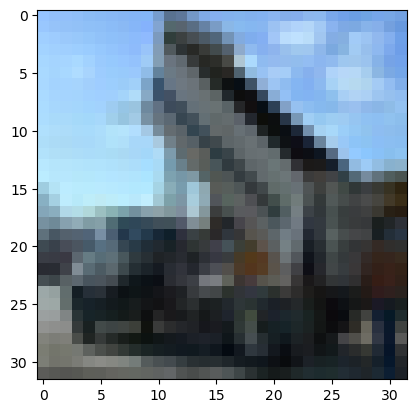

truck


In [38]:
predicted_value=model.predict(X_test)
plt.imshow(X_test[50])
plt.show()
print(class_names[np.argmax(predicted_value[50], axis=0)])